In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/ASUS/Documents/Semester 4/Data Mining/happydata.csv')
df

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0
...,...,...,...,...,...,...,...
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0


# Eksplorasi Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [4]:
df.shape

(143, 7)

### Frekuensi distribusi values pada setiap variabel

In [5]:
for var in df.columns:
    print(df[var].value_counts())

infoavail
5    72
4    46
3    24
1     1
Name: count, dtype: int64
housecost
3    46
2    40
1    30
4    20
5     7
Name: count, dtype: int64
schoolquality
3    65
4    36
2    18
5    17
1     7
Name: count, dtype: int64
policetrust
4    60
3    48
5    26
2     6
1     3
Name: count, dtype: int64
streetquality
4    58
5    32
3    27
2    18
1     8
Name: count, dtype: int64
ëvents
5    63
4    53
3    24
1     2
2     1
Name: count, dtype: int64
happy
1    77
0    66
Name: count, dtype: int64


### Memeriksa missing values pada variabel

In [6]:
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [7]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

### Cek distribusi frekuensi dari variabel target yaitu happy

In [8]:
df['happy'].value_counts()

happy
1    77
0    66
Name: count, dtype: int64

### Cek persentase frekuensi dari happy

In [9]:
df['happy'].value_counts()/float(len(df))

happy
1    0.538462
0    0.461538
Name: count, dtype: float64

In [10]:
print(round(df.describe(),2))

       infoavail  housecost  schoolquality  policetrust  streetquality  \
count     143.00     143.00         143.00       143.00         143.00   
mean        4.31       2.54           3.27         3.70           3.62   
std         0.80       1.12           0.99         0.89           1.13   
min         1.00       1.00           1.00         1.00           1.00   
25%         4.00       2.00           3.00         3.00           3.00   
50%         5.00       3.00           3.00         4.00           4.00   
75%         5.00       3.00           4.00         4.00           4.00   
max         5.00       5.00           5.00         5.00           5.00   

       ëvents   happy  
count  143.00  143.00  
mean     4.22    0.54  
std      0.85    0.50  
min      1.00    0.00  
25%      4.00    0.00  
50%      4.00    1.00  
75%      5.00    1.00  
max      5.00    1.00  


# Data visualisasi

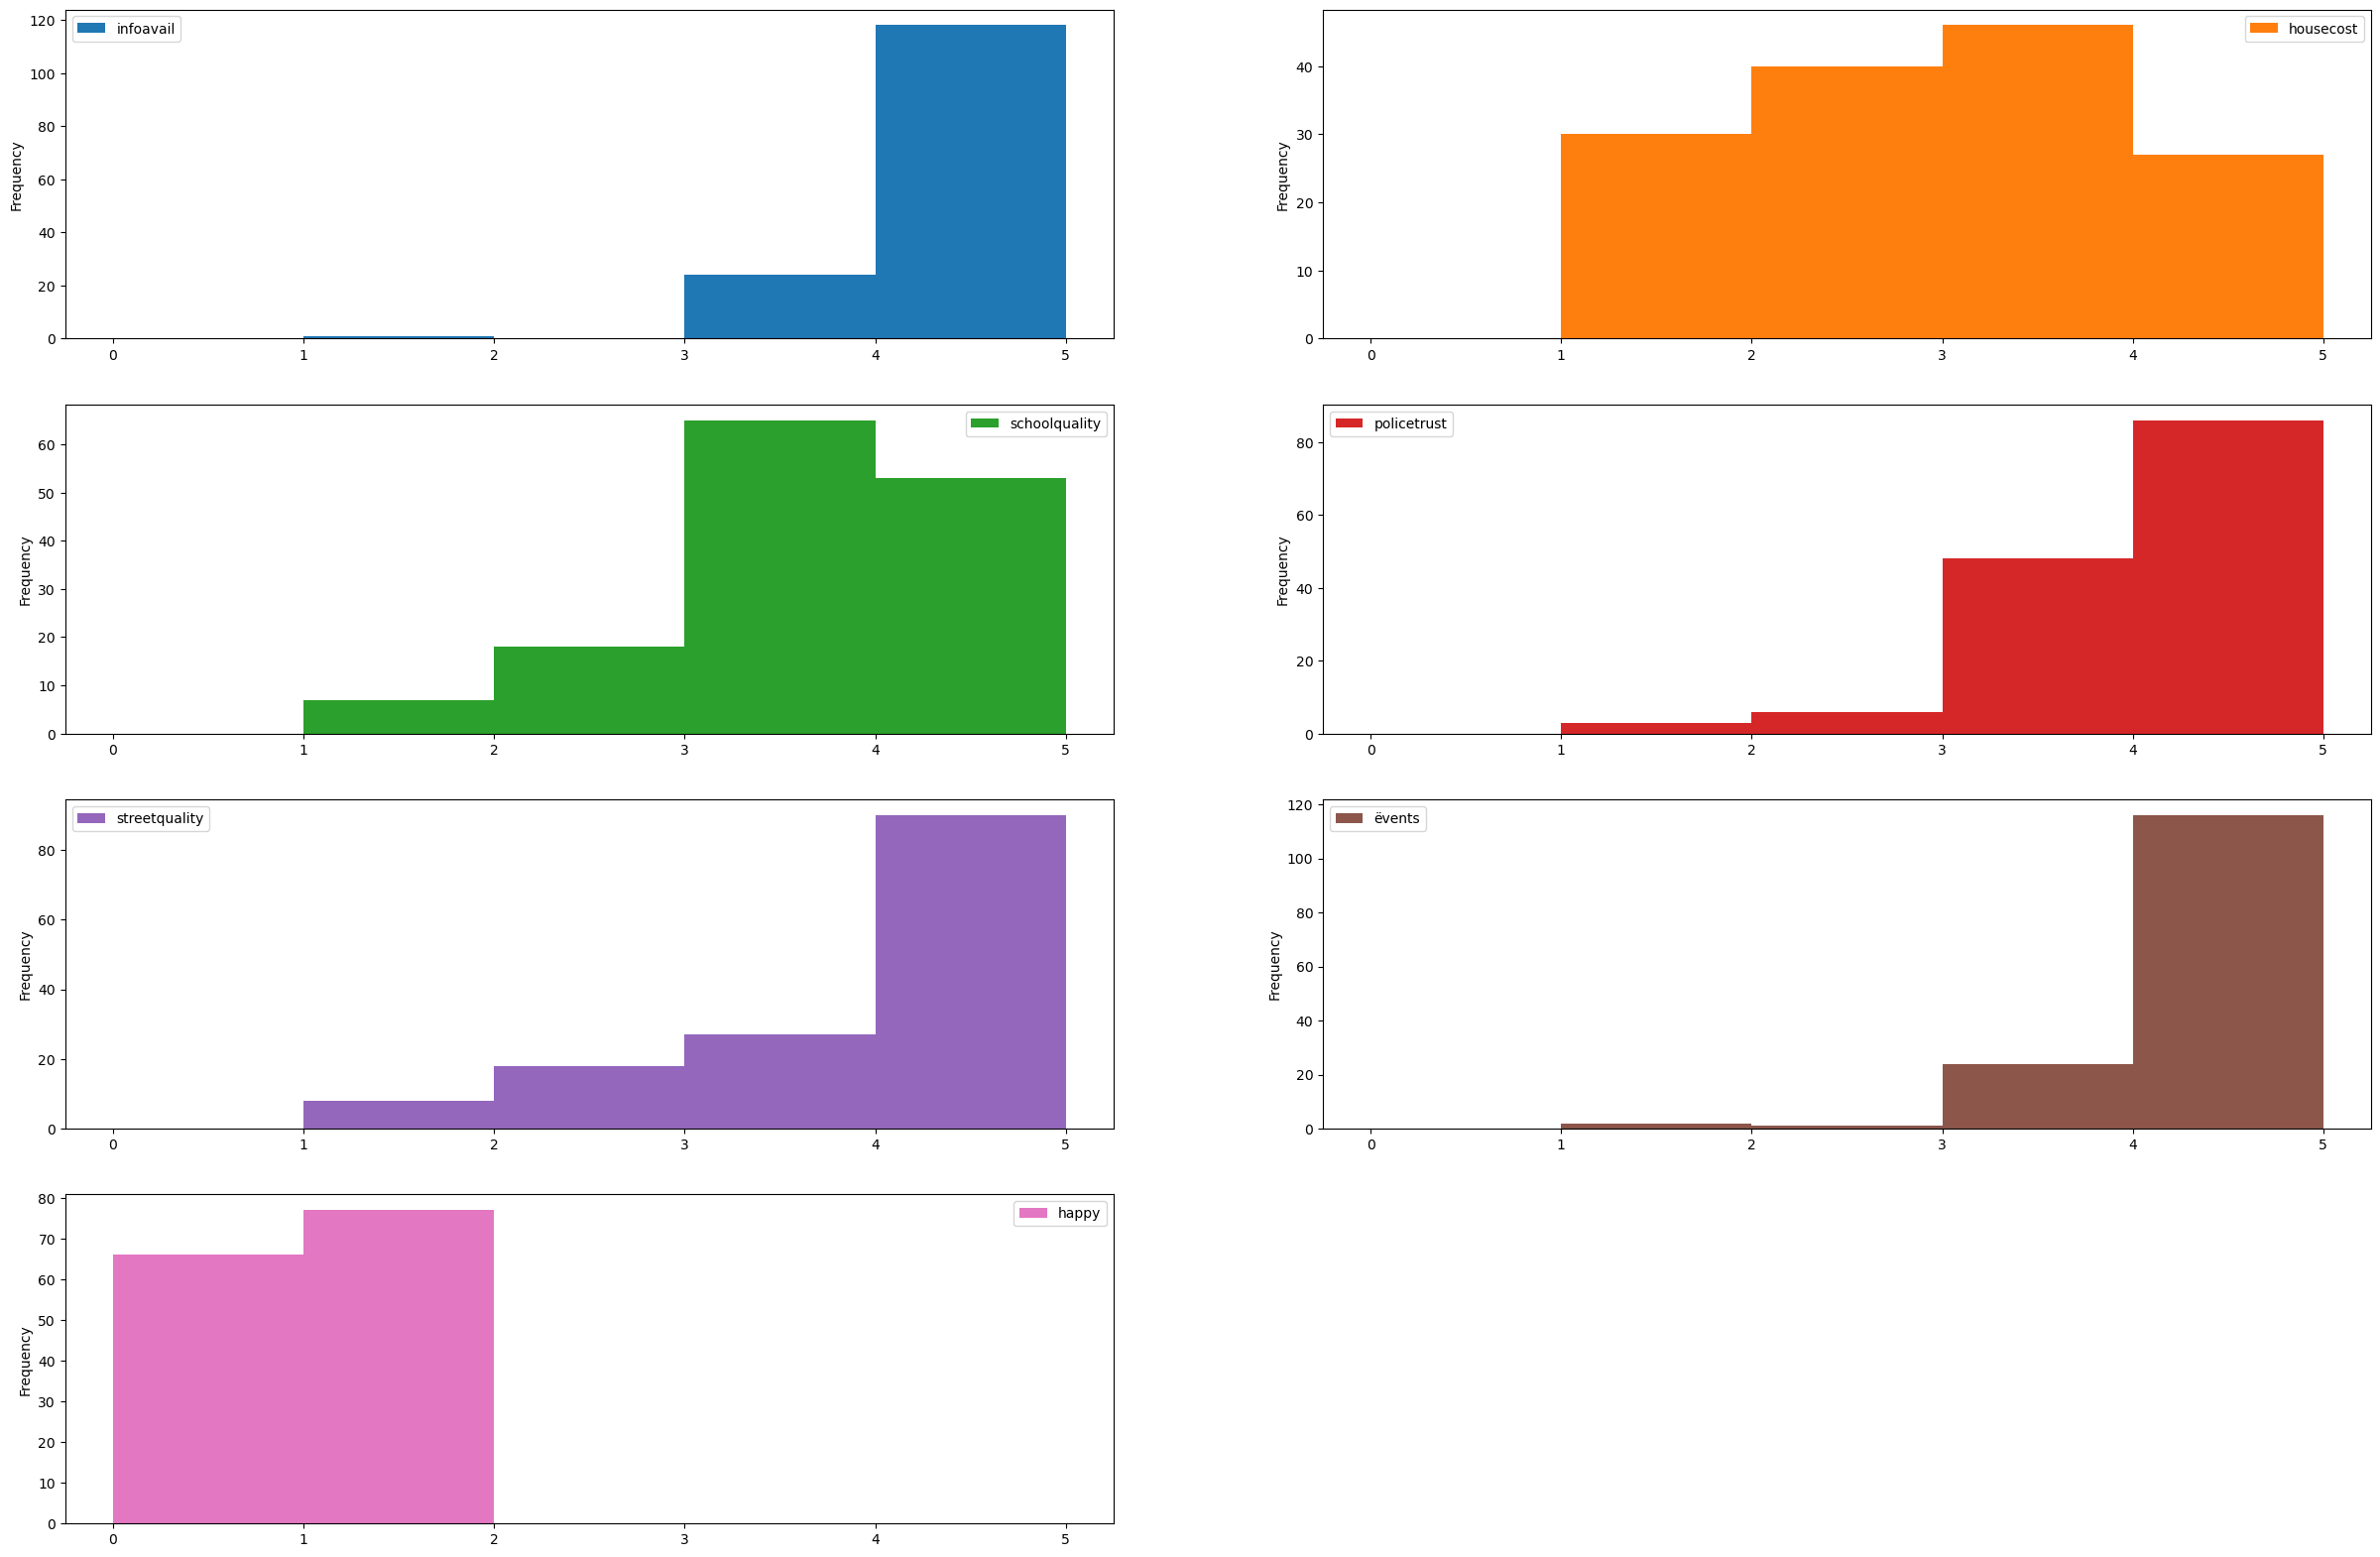

In [11]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=5, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

### Estimasi korelasi koefisien

In [12]:
korelasi = df.corr()

In [13]:
korelasi['happy'].sort_values(ascending=False)

happy            1.000000
infoavail        0.312740
ëvents           0.220729
streetquality    0.206685
schoolquality    0.163639
policetrust      0.113356
housecost        0.019368
Name: happy, dtype: float64

Interpretasi:
Dapat dilihat ternyata semua variabel memiliki pengaruh yang rendah karena mendekati 0

### Heat map korelasi

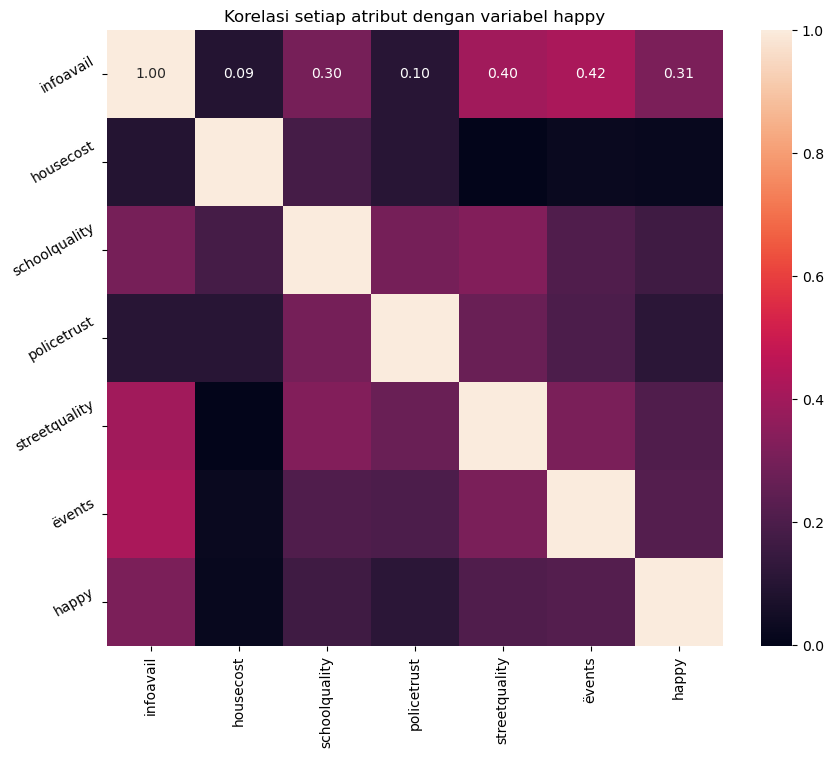

In [14]:
plt.figure(figsize=(10,8))
plt.title('Korelasi setiap atribut dengan variabel happy')
a = sns.heatmap(korelasi, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Scaling data menggunakan MinMax

In [15]:
colnames_numeric = df.columns[0:5]

In [16]:
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[colnames_numeric] = scaler.fit_transform(df[colnames_numeric])

In [19]:
df_1 = df.values.tolist()

In [20]:
trainingSet = []
testSet = []
split = 0.7
train_test_split(df_1, split, trainingSet, testSet)

### Mendefinisikan euclidean untuk mencari jarak

In [21]:
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

### Mendefinisikan KNN(getNeighbors) menggunakan jarak euclidean terdekat dengan data uji

In [22]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


### Mendefinisikan fungsi getResponese yang berfungsi untuk memberikan kelas akhir dari data uji berdasarkan pemilihan mayoritas

In [23]:
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)#Sorting it based on votes
	return sortedVotes[0][0] #Please note we need the class for the top voted class, hence [0][0]#

### Mendefinisikan fungsi getAccuracy yang berfungsi untuk mengukur keakuratan prediksi

In [24]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

### Melakukan prediksi

In [25]:
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=1.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=1.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=1.0
> predicted=1.0, act

In [26]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 62.16216216216216%


In [28]:
trainingSet2 = pd.DataFrame(np.array(trainingSet).reshape(len(trainingSet),7), columns = df.columns)
testSet2 = pd.DataFrame(np.array(testSet).reshape(len(testSet),7), columns = df.columns)

In [29]:
trainingSet2

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,0.50,0.50,0.50,0.75,0.25,4.0,0.0
1,0.50,0.25,0.50,1.00,0.75,3.0,0.0
2,1.00,0.50,0.50,0.50,0.50,5.0,1.0
3,1.00,0.75,0.50,0.50,0.50,5.0,0.0
4,1.00,0.75,0.50,0.50,0.50,5.0,0.0
...,...,...,...,...,...,...,...
101,0.50,0.75,0.75,1.00,0.00,3.0,1.0
102,1.00,1.00,0.00,0.00,1.00,1.0,1.0
103,0.75,0.75,0.75,0.75,0.00,3.0,0.0
104,1.00,0.25,0.50,0.75,0.75,3.0,1.0


In [30]:
trainingSet2.dtypes

infoavail        float64
housecost        float64
schoolquality    float64
policetrust      float64
streetquality    float64
ëvents           float64
happy            float64
dtype: object

In [31]:
testSet2.dtypes

infoavail        float64
housecost        float64
schoolquality    float64
policetrust      float64
streetquality    float64
ëvents           float64
happy            float64
dtype: object

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x_train,y_train = trainingSet2.loc[:,trainingSet2.columns != 'happy'], trainingSet2.loc[:,'happy']
x_test,y_test = testSet2.loc[:,testSet2.columns != 'happy'], testSet2.loc[:,'happy']

In [34]:
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

Prediction: [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
With KNN (K=3) accuracy is:  0.6216216216216216


In [38]:
y_pred_train = knn.predict(x_train)

In [41]:
y_pred = knn.predict(x_test)

y_pred

array([1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1.])

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10  7]
 [ 7 13]]

True Positives(TP) =  10

True Negatives(TN) =  13

False Positives(FP) =  7

False Negatives(FN) =  7


In [44]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [45]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6216


In [46]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3784


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59        17
         1.0       0.65      0.65      0.65        20

    accuracy                           0.62        37
   macro avg       0.62      0.62      0.62        37
weighted avg       0.62      0.62      0.62        37



In [47]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5882


In [48]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5882


In [49]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6500
